<br>
<br>

# Missing value impution: Arbitary value imputation:

<br>
<br>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("dataset/titanic_toy.csv")

<br>
<br>

# Missing value with (pandas) -> arbitary constant:

- `For Age: -1 and 99`
- `For Fare: -1 and 999`

<br>
<br>

In [4]:
X_train,X_test,y_train,y_test= train_test_split(
    df.drop(columns=["Survived"]),
    df["Survived"],
    test_size=0.2,
    random_state=2,
)

In [10]:

X_train["Age_minus"] = X_train["Age"].fillna(-1)
X_train["Age_NineNine"] = X_train["Age"].fillna(99)


X_train["Fare_minus"] = X_train["Fare"].fillna(-1)
X_train["Fare_NineNineNine"] = X_train["Fare"].fillna(999)

X_train.sample(5)


,Age,Fare,Family,Age_minus,Age_NineNine,Fare_minus,Fare_NineNineNine
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
671,31.0,52.0000,1,31.0,31.0,52.0000,52.0000
188,40.0,15.5000,2,40.0,40.0,15.5000,15.5000
835,39.0,83.1583,2,39.0,39.0,83.1583,83.1583
228,18.0,13.0000,0,18.0,18.0,13.0000,13.0000


In [11]:



print(f"Orginal age variable Variance : {X_train["Age"].var()}")
print(f"Age_minus age variable Variance : {X_train["Age_minus"].var()}")
print(f"Age_NineNine age variable Variance : {X_train["Age_NineNine"].var()}")

print()

print(f"Fare age variable Variance : {X_train["Fare"].var()}")
print(f"Fare_minus age variable Variance : {X_train["Fare_minus"].var()}")
print(f"Fare_NineNineNine age variable Variance : {X_train["Fare_NineNineNine"].var()}")



Orginal age variable Variance : 204.34951339046142
Age_minus age variable Variance : 318.0896202624488
Age_NineNine age variable Variance : 951.7275570187188

Fare age variable Variance : 2448.1979137063163
Fare_minus age variable Variance : 2378.5676784883494
Fare_NineNineNine age variable Variance : 47219.202652176304


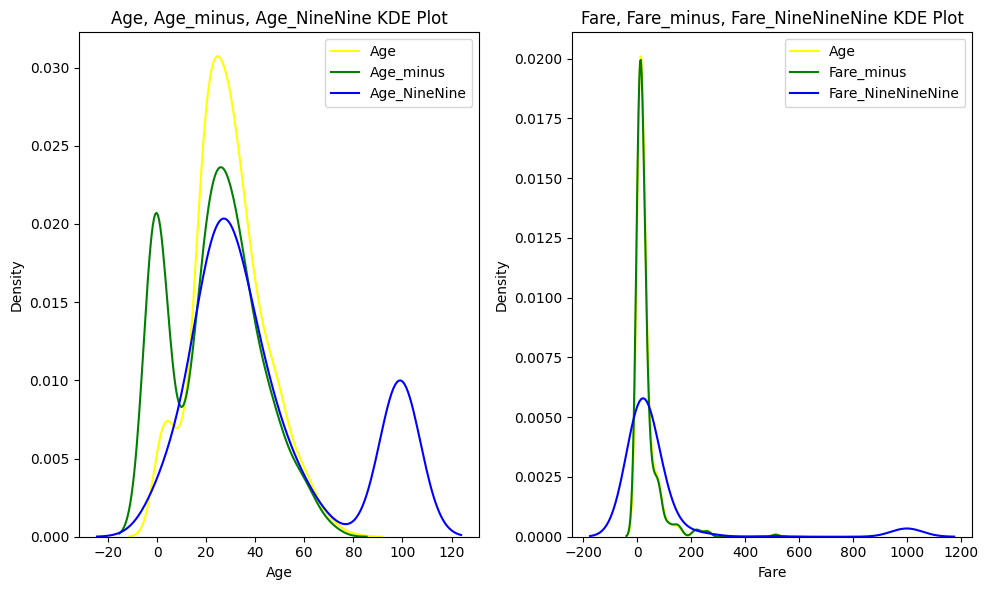

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))


sns.kdeplot(data=df["Age"], ax=ax[0], color="yellow", label="Age")
sns.kdeplot(X_train["Age_minus"], ax=ax[0], color="green", label="Age_minus")
sns.kdeplot(X_train["Age_NineNine"], ax=ax[0], color="blue", label="Age_NineNine")

ax[0].set_title("Age, Age_minus, Age_NineNine KDE Plot")
ax[0].legend()


sns.kdeplot(data=df["Fare"], ax=ax[1], color="yellow", label="Age")
sns.kdeplot(X_train["Fare_minus"], ax=ax[1], color="green", label="Fare_minus")
sns.kdeplot(X_train["Fare_NineNineNine"], ax=ax[1], color="blue", label="Fare_NineNineNine")

ax[1].set_title("Fare, Fare_minus, Fare_NineNineNine KDE Plot")
ax[1].legend()

fig.tight_layout()

plt.show()
